# DATA IMPORT

In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from matplotlib import rc,font_manager
# import seaborn as sns
from scipy import optimize, stats
%matplotlib inline
import os
from uncertainties import ufloat
from uncertainties.umath import *

try:
    fm = font_manager.json_load(os.path.expanduser("~/.cache/matplotlib/fontlist-v300.json"))
except FileNotFoundError:
    fm = font_manager.json_load(os.path.expanduser("~/.cache/matplotlib/fontlist-v310.json"))
fm.findfont("serif", rebuild_if_missing=False)
rc('font',**{'family':'sans-serif','sans-serif':['Computer Modern Sans serif']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex=True)
plt.rcParams.update({'font.size': 12})

# name colunms
cols_to_imp = [1,4,5,8,9,64,68,72,77]
cols_labels = ['1','3','1-3','4','1-4','7','3-7','4-7','4-ph']

#cols_to_imp = list(range(1, 16))
#cols_labels = ['ha','va','hava','hb','hahb','vahb','havahb','vb','havb','vavb','havavb','hbvb','hahbvb','vahbvb','hahbvavb']

# find all data files and sort alphanumerically
fold = 'data/2020_02_04/dip_powers/'
dat_files = glob.glob(fold + '*.dat')
dat_files = sorted(dat_files, key=str)

# create list of ints for x-axis - each element is one x value, ordered
power = []
dfs = []
for dat_file in dat_files:
    pwr = dat_file.replace(fold, '')
    pwr = pwr.replace('.dat', '')
    print(pwr)
    # check if it's an 'in' or 'out' file, and only add one of each to 'power'
    if pwr[-1]=='n':
        power.append(int(pwr[:-2]))
    # add to dataframe
    tmp_df = pd.read_csv(dat_file, sep=' ', header=None, names=cols_labels, usecols=cols_to_imp)
    tmp_df['Power_where'] = pwr
    dfs.append(tmp_df)


print(power)

#concatenate dataframes into a single one
df = pd.concat(dfs, sort=False)

# check some stuff
# print(df.info())
# print(df[df['Position'] == position[1]].info())
# print(dfs[1].iloc[:,4:10].describe())

110in
110out
151in
151out
196in
196out
255in
255out
305in
305out
366in
366out
422in
422out
541in
541out
643in
643out
747in
747out
860in
860out
[110, 151, 196, 255, 305, 366, 422, 541, 643, 747, 860]


## Process imported data
### Visibility and 4-photon rate

In [2]:
# now we'll create 2 arrays of visibility for each measurement:
vis, viserr, = ([] for i in range(2))

# and 2 arrays of 4-photon coincidences and error for each measurement:
four, fourerr, = ([] for i in range(2))

for measurement in power:
    ind = str(measurement)+'in'
    out = str(measurement)+'out'
    l_i = len(df[df['Power_where'] == ind]['4-ph'].index)
    l_o = len(df[df['Power_where'] == out]['4-ph'].index)
    T = df[df['Power_where'] == out]['4-ph'].sum()
    t = df[df['Power_where'] == ind]['4-ph'].sum()
    vis.append((T/l_o - t/l_i) / (T/l_o))
    viserr.append(np.sqrt((T*l_o)**2/(l_i**2*T**3) + (l_o/l_i/T)**2*t))
    four.append(T/l_o)
    fourerr.append(np.sqrt(T)/l_o)

print(vis,viserr)
print(four,fourerr)

[0.8678092466912343, 0.8566485006410426, 0.8470757858253221, 0.8262042094158882, 0.8125267059080009, 0.8010823460582127, 0.7984202731610992, 0.7483467066396261, 0.7268924423907095, 0.7195573851290845, 0.6945175887800713] [0.01814417749916345, 0.021332472112175704, 0.018575537077443555, 0.01855293255221984, 0.01922170896398605, 0.01373772663022466, 0.013703628191065919, 0.01050549082947335, 0.009246772977221925, 0.0074864729379624205, 0.006965750435365243]
[5.122727272727273, 9.095108695652174, 14.92039800995025, 27.677419354838708, 41.89041095890411, 60.77333333333333, 86.81428571428572, 151.21333333333334, 222.25675675675674, 311.8030303030303, 431.3098591549296] [0.08810055612185837, 0.15720995287087747, 0.2724533645789665, 0.42256833274355654, 0.7575230993259447, 0.9001728229129733, 1.1136445041541099, 1.4199217505826782, 1.7330521301744268, 2.1735428079347097, 2.4647082481829323]


## Singles

In [3]:
# now we'll create 2 arrays of total singles for each measurement:
sing, singerr, = ([] for i in range(2))

for measurement in power:
    ind = str(measurement)+'in'
    out = str(measurement)+'out'
    l_i = len(df[df['Power_where'] == ind]['1'].index)
    l_o = len(df[df['Power_where'] == out]['1'].index)
    Tot = df[df['Power_where'] == out]['1'].sum()+df[df['Power_where'] == out]['3'].sum()
    +df[df['Power_where'] == out]['4'].sum()+df[df['Power_where'] == out]['7'].sum()
    tot = df[df['Power_where'] == ind]['1'].sum()+df[df['Power_where'] == ind]['3'].sum()
    +df[df['Power_where'] == ind]['4'].sum()+df[df['Power_where'] == ind]['7'].sum()
    sing.append((Tot/l_o+tot/l_i)/4)
    #viserr.append(np.sqrt(m**2/M**3 + m/M**2))
    singerr.append(np.sqrt(Tot/16/l_o**2+tot/16/l_i**2))

print(sing,singerr)
#df[df['Power_where'] == '110in']['7'].sum()/len(df[df['Power_where'] == '110in']['3'].index)

[181350.33004368003, 235643.6627940974, 302348.8929121996, 401973.51106663526, 482145.78456621006, 577976.7661111112, 678798.8193452382, 863163.0133333333, 1034059.305984556, 1201278.2752164502, 1387167.4824477166] [8.26947416897803, 13.16135385994233, 19.118012665681608, 26.28637258990329, 40.36300162605351, 42.02672525303188, 48.894229104602154, 53.639631285500506, 59.942315039753844, 66.48719878067618, 71.19575937268665]


## Concidences

In [4]:
# now we'll create 2 arrays of total coincidences for each measurement:
coincs, coincserr, = ([] for i in range(2))

coincs_str = ['1-3','1-4','3-7','4-7']

for measurement in power:
    Tot = 0
    tot = 0
    ind = str(measurement)+'in'
    out = str(measurement)+'out'
    l_i = len(df[df['Power_where'] == ind]['1'].index)
    l_o = len(df[df['Power_where'] == out]['1'].index)
    for add in coincs_str:
        Tot += df[df['Power_where'] == out][add].sum()
        tot += df[df['Power_where'] == ind][add].sum()
    coincs.append((Tot/l_o+tot/l_i)/4)
    #viserr.append(np.sqrt(m**2/M**3 + m/M**2))
    coincserr.append(np.sqrt(Tot/16/l_o**2+tot/16/l_i**2))

print(coincs,coincserr)
#df[df['Power_where'] == '110in']['7'].sum()/len(df[df['Power_where'] == '110in']['3'].index)

[29920.53768768769, 39149.19130950743, 50731.42311330671, 67997.84006357429, 82587.25566210045, 100066.55388888888, 119276.72212301588, 154851.31666666665, 187935.94642857142, 220721.13798701297, 259342.64249893298] [3.3588722686585872, 5.366008490437082, 7.829900691717389, 10.81146222438425, 16.7050365467119, 17.482903174103026, 20.494992845074513, 22.719398221686145, 25.556491230246273, 28.49778843495834, 30.787857238657285]


## C/S and S mode 1

In [5]:
# now we'll create 2 arrays of total C/S for each measurement:
c_s, c_serr, = ([] for i in range(2))
sing1, sing1err, = ([] for i in range(2))

for measurement in power:
    #C/S
    out = str(measurement)+'out'
    S = ufloat(df[df['Power_where'] == out]['1'].sum(), np.sqrt(df[df['Power_where'] == out]['1'].sum()))
    C = ufloat(df[df['Power_where'] == out]['1-3'].sum()+df[df['Power_where'] == out]['1-4'].sum(), 
              np.sqrt(df[df['Power_where'] == out]['1-3'].sum()+df[df['Power_where'] == out]['1-4'].sum()))
    Sc = S + C
    c_s.append(C/S)
#    c_serr.append(np.sqrt(S/(C**2)*(1+S/C)))
    #singles
    l_o = len(df[df['Power_where'] == out]['1'].index)
    sing1.append(S/l_o)
#    sing1err.append(np.sqrt(S)/l_o)

print(c_s)
print(sing1)

[0.16273774664921753+/-3.842881310188583e-05, 0.16505121777832532+/-4.549035586541777e-05, 0.1659176340542074+/-5.444819466379856e-05, 0.16814117390991054+/-5.428350127316643e-05, 0.17084321772351507+/-7.286530335420813e-05, 0.17276400279356446+/-6.602275759130741e-05, 0.17448263198202144+/-6.339220630885889e-05, 0.17755700062829485+/-5.482655592078306e-05, 0.18073042168986722+/-5.0996972523945053e-05, 0.18266720664828265+/-5.041618138489388e-05, 0.18637556845236106+/-4.571281522371288e-05]
[194138.73333333334+/-17.15078995147442, 252509.23369565216+/-26.194778027540114, 324636.53233830846+/-40.18839541535885, 430033.2193548387+/-52.67264818485407, 516097.87671232875+/-84.08230448534428, 619748.24+/-90.90274950003806, 728499.1142857143+/-102.01534298369845, 927420.1866666666+/-111.20073061310745, 1108821.1621621621+/-122.4094349261859, 1287772.9848484849+/-139.68432944193742, 1490310.9436619717+/-144.8802780959318]


# FIT AND PLOT
## Dip visibility VS Power

[ 0.47928369 -0.00067321  0.42448138]
1.0


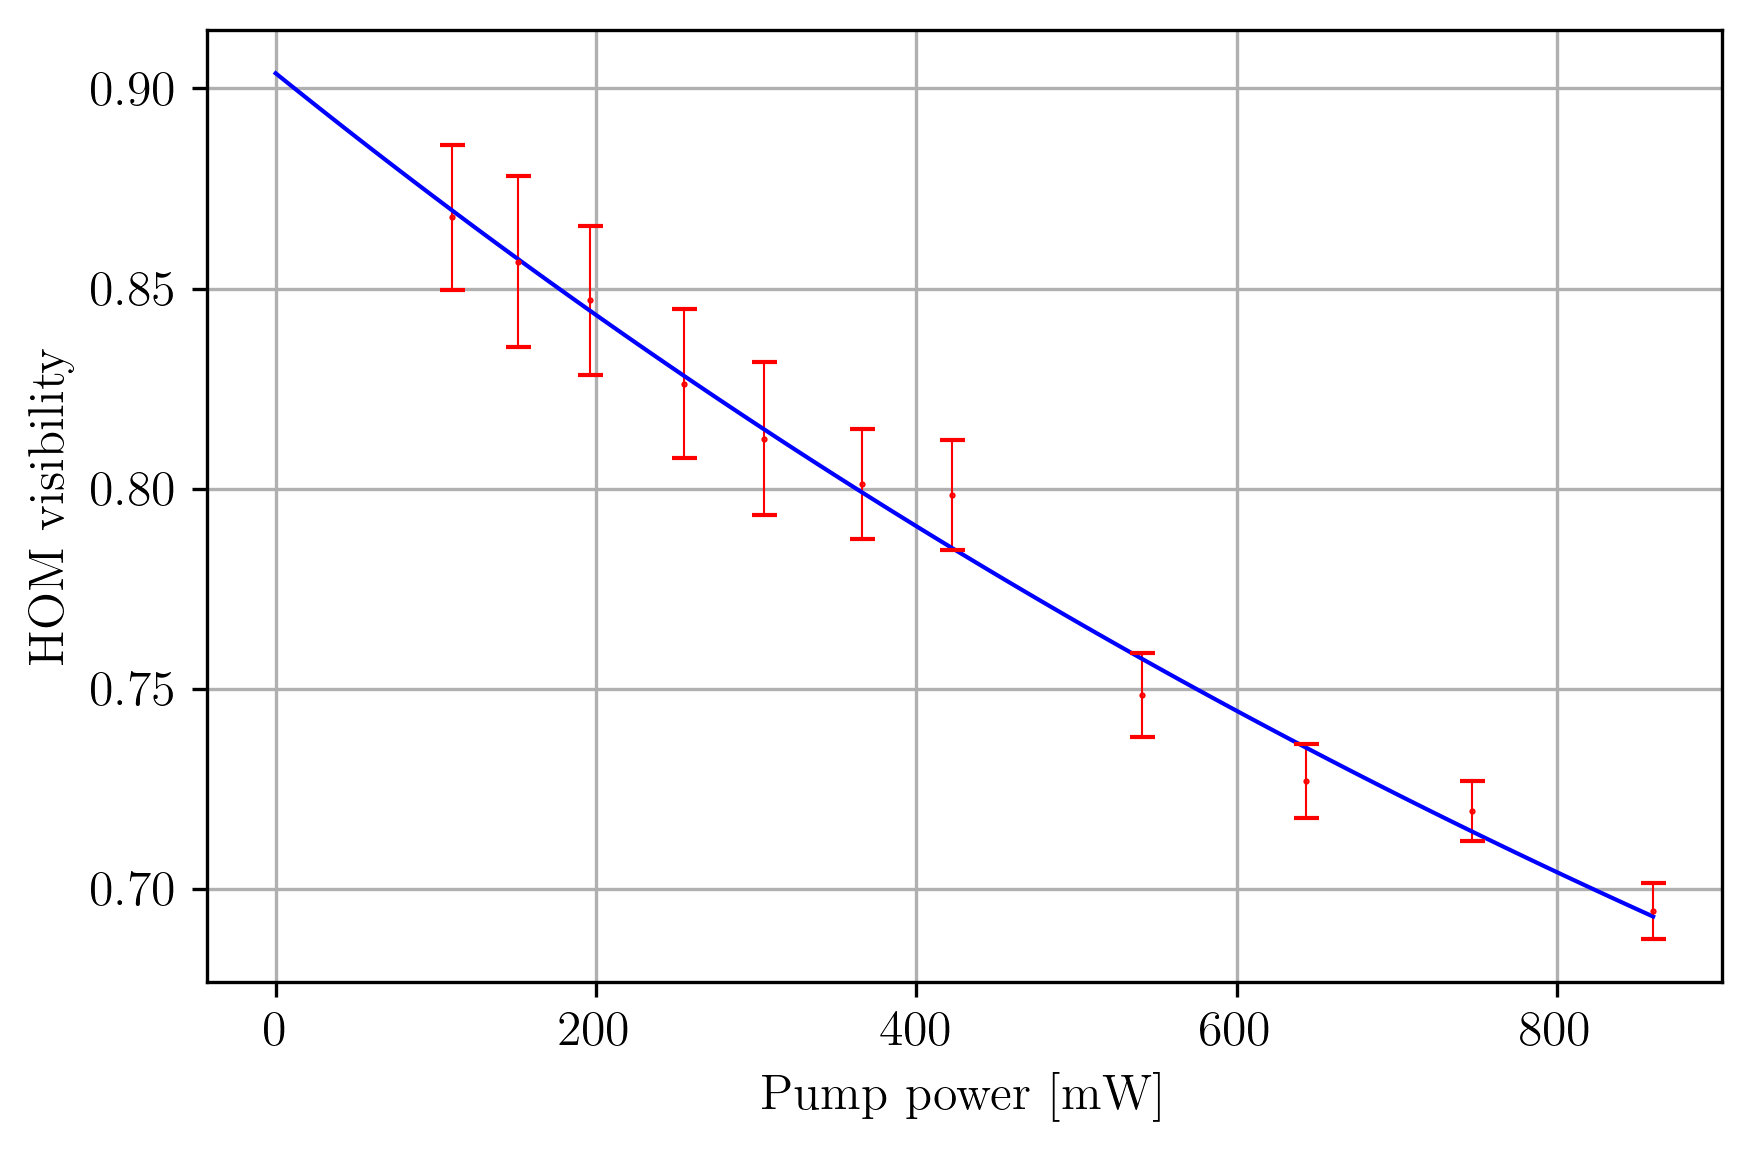

In [13]:
# fit to custom function with scipy
# exponential
def expo(x, a, b, c):
    return a * np.exp(b*x) + c


# actual fitting
#exponential
paramse, params_covariancee = optimize.curve_fit(expo, power, vis, p0=[0.3,-0.0008,0.5])

print(paramse)

# testing goodness of exponential fit
teste = []
for el in power:
    teste.append(expo(el, paramse[0], paramse[1], paramse[2]))


chie, pvale = stats.chisquare(vis,teste)
print(pvale)

# plot stuff
# sns.set()
x_data = np.linspace(0, power[-1], num=100)

fig, ax = plt.subplots(1, 1, dpi=300)
col1 = 'r'

#exponential
ax.plot(x_data, expo(x_data, paramse[0], paramse[1], paramse[2]), linewidth=1, c='b', label='HOM vis (fit)')

ax.errorbar(power, vis, yerr=viserr, fmt='.', ms=1, elinewidth=.5, capsize=3, label='HOM vis (data)', c=col1)

#ax.set_ylim(0,100)
ax.grid(True)

ax.set_ylabel(r'HOM visibility')
ax.set_xlabel(r'Pump power [mW]')
#for tl in ax.get_yticklabels():
#    tl.set_color(col1)

fig.tight_layout()
#fig.legend(loc=(.38,.73))
fig.savefig("HOMvis_vs_power.pdf", format='pdf', bbox_inches='tight')

plt.show()

## Singles and coincidences VS pump power

[  3.23928448 -17.8127067 ]
0.9938529153164285
[  0.61495872 -18.289923  ]
0.9811263449613026
[ 2.84096129e-03 -5.06490849e-01  4.93632191e+01]
0.9772541907368693


/usr/lib/python3/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


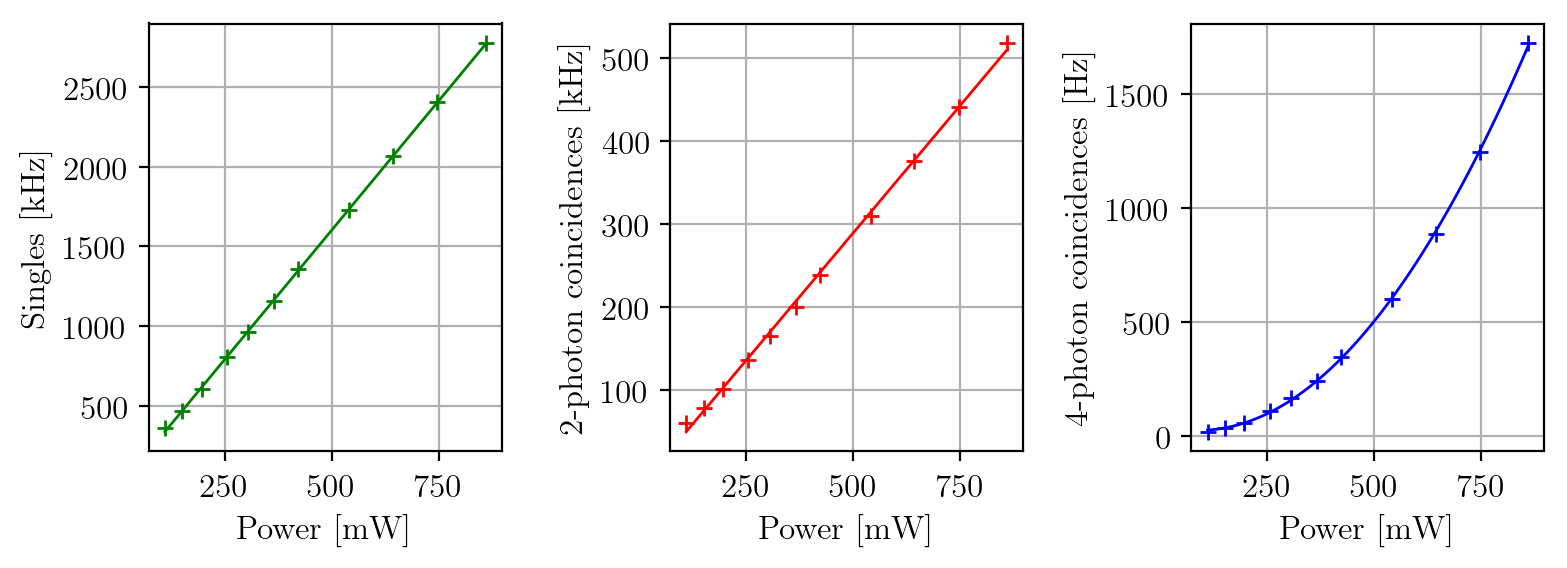

In [7]:
plt.rcParams.update({'font.size': 12})
# fit to custom function with scipy

# linear
def line(x, a, b):
    return a * x + b

# quadratic
def quad(x, a, b, c):
    return a * x**2 + b*x + c

# quadratic with (0,0)
#def quad(x, a, b):
#    return a * x**2 + b*x

# plot stuff
# sns.set()
x_data = np.linspace(power[0], power[-1], num=100)

fig, ax = plt.subplots(1, 3, figsize=(8,3), dpi=200)
    
# plot singles
# line fitting
sing_khz = np.asarray(sing)/1000*2 #multiply by because 2 crystals
params_s, params_covariance_s = optimize.curve_fit(line, power, sing_khz, p0=[1000,1000])
print(params_s)

# testing goodness of linear fit
test_s = []
for el in power:
    test_s.append(line(el, params_s[0], params_s[1]))
chi_s, pval_s = stats.chisquare(sing_khz,test_s)
print(pval_s)

ax[0].plot(power, sing_khz, '+', color='g', label='Singles (data)')
ax[0].plot(x_data, line(x_data, params_s[0], params_s[1]), linewidth=1, color='g', label='Singles (fit)')
ax[0].set_ylabel('Singles [kHz]')

# plot coincidences
# line fitting
coinc = np.asarray(coincs)/1000*2 #multiply by because 2 crystals
params_c, params_covariance_c = optimize.curve_fit(line, power, coinc, p0=[1000,1000])
print(params_c)

# testing goodness of linear fit
test_c = []
for el in power:
    test_c.append(line(el, params_c[0], params_c[1]))
chi_c, pval_c = stats.chisquare(coinc,test_c)
print(pval_c)

ax[1].plot(power, coinc, '+', color='r', label='Coincidences (data)')
ax[1].plot(x_data, line(x_data, params_c[0], params_c[1]), linewidth=1, color='r', label='Coincidences (fit)')
ax[1].set_ylabel('2-photon coincidences [kHz]')

# plot 4 coincidences
# quad fitting
fourc = np.asarray(four)*4 #multiply by because 2 crystals
params_f, params_covariance_f= optimize.curve_fit(quad, power, fourc, p0=[1,1,1])
print(params_f)

# testing goodness of linear fit
test_f = []
for el in power:
    test_f.append(quad(el, params_f[0], params_f[1], params_f[2]))
chi_f, pval_f = stats.chisquare(fourc,test_f)
print(pval_f)

#ax[2].errorbar(power, four, yerr=fourerr, fmt='.', ms=1, elinewidth=.5, capsize=3, label='HOM vis (data)', c='b')
ax[2].plot(power, fourc, '+', color='b', label='4-photon coincidences (data)')
ax[2].plot(x_data, quad(x_data, params_f[0], params_f[1], params_f[2]), linewidth=1, color='b', label='4-photon coincidences (fit)')
ax[2].set_ylabel('4-photon coincidences [Hz]')

for i in range(len(ax)):
    ax[i].set_xlabel('Power [mW]')
    ax[i].grid(True)
#plt.yscale('log')

fig.tight_layout()
#fig.legend(loc=(.38,.73))
#fig.savefig("exp_rates_vs_power.pdf", format='pdf', bbox_inches='tight')

plt.show()

# 4-photon as function of coincidences, with theoretical fit
(requires cell above)

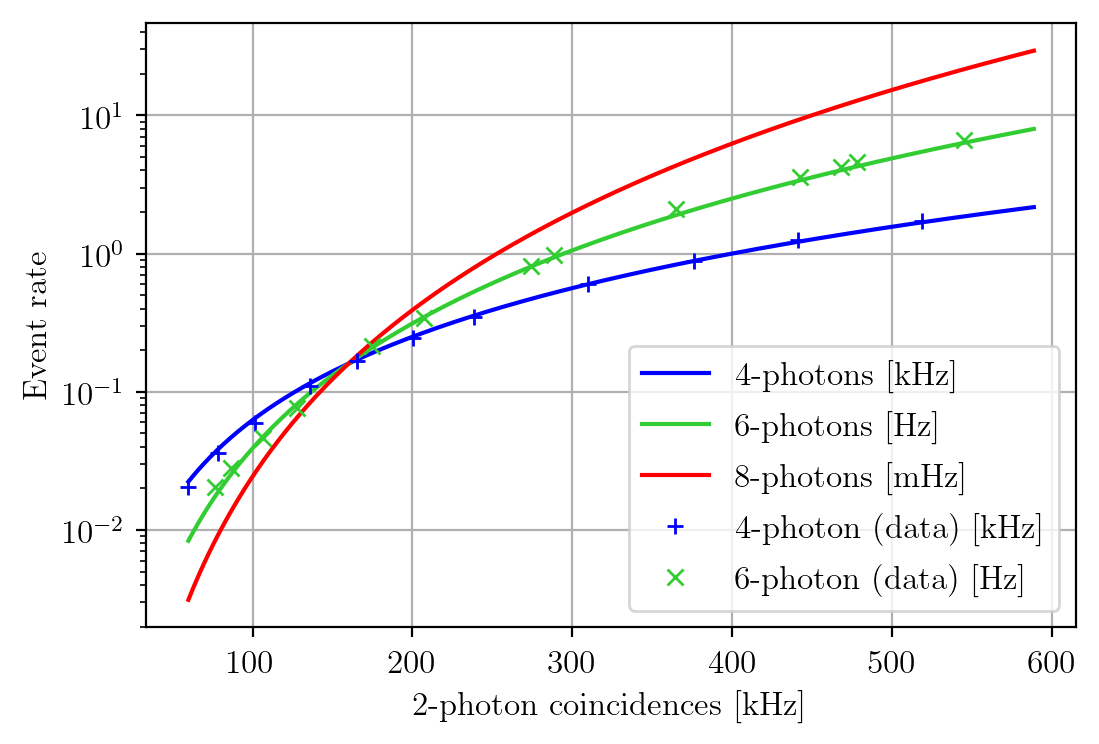

In [10]:
# six photon rates from GHZ6_witness

#final
#6-photon events: 1450. Average rate: 0.024217 Hz
#Avg coincs: P1: 81755 Hz, P2: 82631 Hz, P3: 76014 Hz ~ 80133

#Total 6-photon events: 159. Average rate: 0.020000 Hz
#Avg coincs: P1: 82627 Hz, P2: 79243 Hz, P3: 73962 Hz

#Total 6-photon events: 270. Average rate: 0.029752 Hz
#Avg coincs: P1: 84707 Hz, P2: 86288 Hz, P3: 79181 Hz
                
#sigma_x 55
#6-photon events: 313. Average rate: 0.086944 Hz
#Avg coincs: P1: 126732 Hz, P2: 121097 Hz, P3: 114547 Hz

#sigma_z 65
#6-photon events: 962. Average rate: 0.305397 Hz
#Avg coincs: P1: 174549 Hz, P2: 188755 Hz, P3: 172656 Hz

#M2/Phase II/first datafile
#Total 6-photon events: 379. Average rate: 1.90 Hz
#Avg coincs: P1: 319058 Hz, P2: 312727 Hz, P3: 267992 Hz

#Total 6-photon events: 1057. Average rate: 2.20 Hz
#Avg coincs: P1: 328345 Hz, P2: 319630 Hz, P3: 280949 Hz
                
#Total 6-photon events: 829. Average rate: 2.76 Hz
#Avg coincs: P1: 351083 Hz, P2: 341953 Hz, P3: 298253 Hz
    
#Total 6-photon events: 961. Average rate: 3.20 Hz
#Avg coincs: P1: 349863 Hz, P2: 367583 Hz, P3: 297415 Hz

#corrected for accidentals
six_coincs = [288.6048849537037, 274.0172486419753, 206.9341519047619, 174.88579683867968,
             76.66942365147015, 86.22900459136822, 106.38905819878005,
             127.58640037037037, 364.7824361111111, 478.02960504201684, 442.5277972222222, 544.9621656746032, 468.3479319444445]
six_hz = [0.9731273525402481, 0.8060627154826234, 0.33973700472887847, 0.21515376098810546,
         0.020470852426329147, 0.02807867245535758, 0.04670032299459625,
         0.07647947686860805, 2.102004837422381, 4.6129364085692, 3.5908604383385785, 6.680104147726741, 4.24988944572403]

#six_coincs = [74.348,83.392,176.524,260.27,248.044,191.242,
#             418.392,458.984,324.005,381.090,401.512]
#six_hz = [0.020471,0.028079,0.244421,0.973127,0.8061,0.339737,
#         5.422908,7.425075,2.112039,3.774202,4.317060]

coinc_th = np.linspace(coinc[0], coinc[-1]+70, num=500)

fig, ax = plt.subplots(1, 1, dpi=200)

# 4-photon rate
four_th = (coinc_th*1000)**2/(2*(80000000))/1000

# 6-photon rate
six_th = (coinc_th*1000)**3/(4*(80000000**2))

# 8-photon rate per hour
eight_th = (coinc_th*1000)**4/(8*(80000000**3))*1000

#theory plots
ax.plot(coinc_th, four_th, 'b', label='4-photons [kHz]')
ax.plot(coinc_th, six_th, 'limegreen', label='6-photons [Hz]')
ax.plot(coinc_th, eight_th, 'r', label='8-photons [mHz]')

#experimental plot
four_khz = np.asarray(fourc)/1000
ax.plot(coinc, four_khz, '+', color='b', label='4-photon (data) [kHz]')
ax.plot(six_coincs, six_hz, 'x', color='limegreen', label='6-photon (data) [Hz]')

ax.grid()

ax.set_xlabel('2-photon coincidences [kHz]')
ax.set_ylabel('Event rate')

plt.yscale('log')
plt.legend()

fig.savefig("multi-ph_rates_vs_power.pdf", format='pdf', bbox_inches='tight')
#plt.show()

## $R_P$ vs pump power

[0.00011459 0.00260626]
[-1.20398210e-08  1.26001156e-04  6.25209291e-04]
1.0
1.0


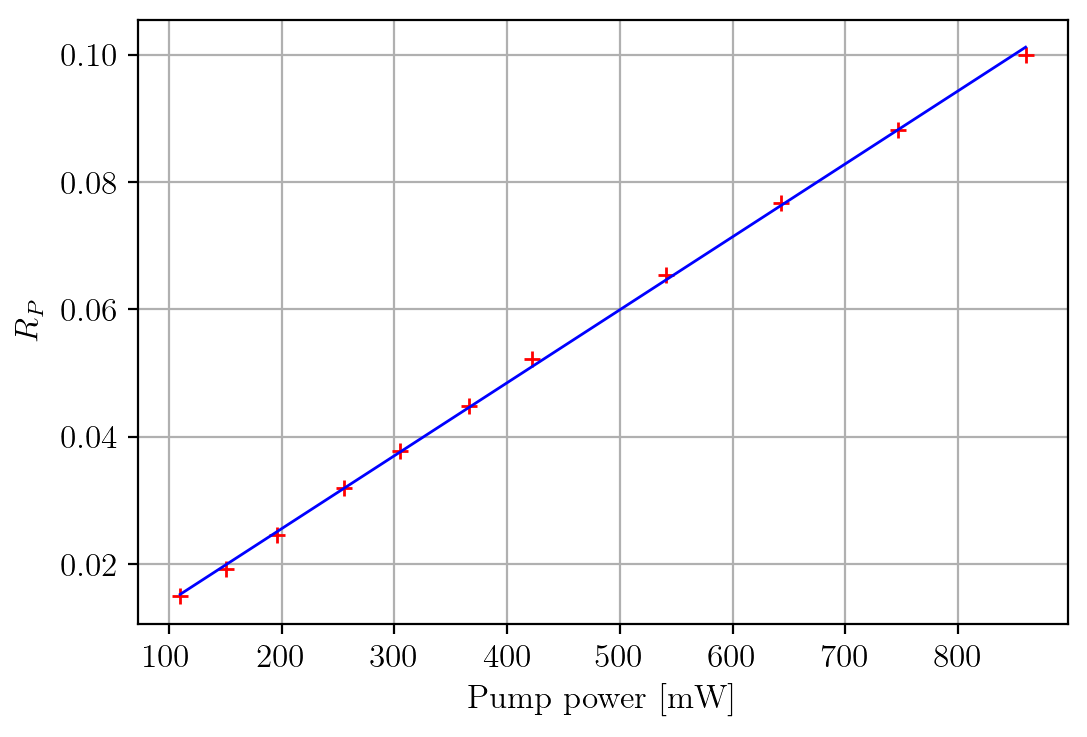

In [20]:
plt.rcParams.update({'font.size': 12})
# fit to custom function with scipy

# linear
def line(x, a, b):
    return a * x + b

# quadratic
def quad(x, a, b, c):
    return a * x**2 + b*x + c

# plot stuff
# sns.set()
x_data = np.linspace(power[0], power[-1], num=100)

fig, ax = plt.subplots(1, 1, dpi=200)

# calculate R_P
R_P = []
[R_P.append(sing1[i]/c_s[i]/8E7) for i in range(len(c_s))]
R_Pn = []
R_Ps = []
[R_Pn.append(R_P[i].n) for i in range(len(R_P))]
[R_Ps.append(R_P[i].s) for i in range(len(R_P))]

# line fitting
#sing_khz = np.asarray(sing)/1000
params, params_covariance = optimize.curve_fit(line, power, R_Pn, p0=[.0001,.001])
print(params)

# quad fitting
#sing_khz = np.asarray(sing)/1000
params_q, params_covariance_q = optimize.curve_fit(quad, power, R_Pn, p0=[.0001,.001,1])
print(params_q)

# testing goodness of linear fit
test = []
for el in power:
    test.append(line(el, params[0], params[1]))
chi, pval = stats.chisquare(R_Pn,test)
print(pval)

# testing goodness of quadratic fit
test_q = []
for el in power:
    test_q.append(quad(el, params_q[0], params_q[1], params_q[2]))
chi_q, pval_q = stats.chisquare(R_Pn,test)
print(pval_q)

#ax.errorbar(power, R_Pn, yerr=R_Ps, fmt='.', ms=1, elinewidth=.5, capsize=3, label='HOM vis (data)', color='b')
ax.plot(power, R_Pn, '+', color='r', label='$R_P$ (data)')
ax.plot(x_data, line(x_data, params[0], params[1]), linewidth=1, color='b', label='$R_P$ (fit)')
#ax.plot(x_data, quad(x_data, params_q[0], params_q[1], params_q[2]), linewidth=1, color='r', label='$R_P$ (fit)')
ax.set_xlabel('Pump power [mW]')
ax.set_ylabel('$R_P$')
ax.grid(True)

fig.savefig("R_P_vs_Power.pdf", format='pdf', bbox_inches='tight')

## Process imported data
### 2-photon coincidences

In [80]:
# now we'll create 8 arrays of average coincidences for each measurement:
# HH Pair 1, HV Pair 1, HH Pair 2, VH Pair 2 + uncertainties
two_ph,twopherr = ([] for i in range(2))

for measurement in power:
    ind = str(measurement)+'in'
    out = str(measurement)+'out'
    l_i = len(df[df['Power_where'] == ind]['1-3'].index)
    l_o = len(df[df['Power_where'] == out]['1-3'].index)
    coincO = (df[df['Power_where'] == out]['1-3'].sum()+df[df['Power_where'] == out]['1-4'].sum()
    +df[df['Power_where'] == out]['1-3'].sum()+df[df['Power_where'] == out]['1-3'].sum())/l_o
    coincI = (df[df['Power_where'] == ind]['1-3'].sum()+df[df['Power_where'] == ind]['1-4'].sum()
    +df[df['Power_where'] == ind]['1-3'].sum()+df[df['Power_where'] == ind]['1-3'].sum())/l_i
    two_ph.append((coincO+coincI)/4)

print(two_ph)

[33715.51427791428, 45061.41723995597, 58118.06271459603, 77369.4044266541, 94734.6196803653, 113200.84833333333, 134413.95158730156, 176469.18333333335, 213153.42229729728, 247979.72532467532, 294204.58520059753]


## FIT AND PLOT

[ 3.64861033e-01 -2.88952532e-06  5.37202158e-01]
1.0


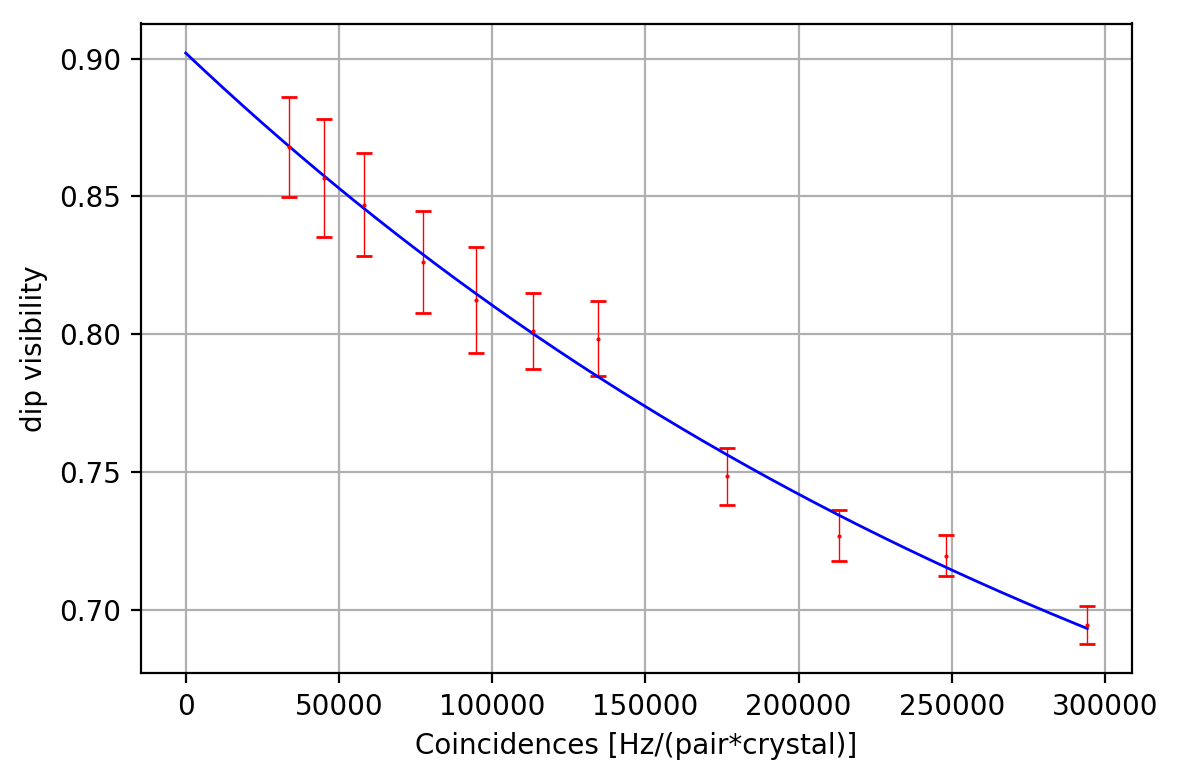

In [82]:
# fit to custom function with scipy

# linear
def line(x, a, b):
    return a * x + b

# quadratic
def quad(x, a, b, c):
    return a * x**2 + b*x + c

# exponential
def expo(x, a, b, c):
    return a * np.exp(b*x) + c

# actual fitting
#linear
params, params_covariance = optimize.curve_fit(line, two_ph, vis, p0=[0.0002,0.95])
#quadratic
paramsq, params_covarianceq = optimize.curve_fit(quad, two_ph, vis, p0=[0.0002,0.01,0.95])
#exponential
paramse, params_covariancee = optimize.curve_fit(expo, two_ph, vis, p0=[0.95,-0.000001,0.5])

#print(params)
#print(paramsq)
print(paramse)

# testing goodness of linear fit
test = []
for el in two_ph:
    test.append(line(el, params[0], params[1]))


chi, pval = stats.chisquare(vis,test)
#print(pval)

# testing goodness of quadratic fit
testq = []
for el in two_ph:
    testq.append(quad(el, paramsq[0], paramsq[1], paramsq[2]))


chiq, pvalq = stats.chisquare(vis,testq)
#print(pvalq)

# testing goodness of exponential fit
teste = []
for el in two_ph:
    teste.append(expo(el, paramse[0], paramse[1], paramse[2]))


chie, pvale = stats.chisquare(vis,teste)
print(pvale)

# plot stuff
# sns.set()
x_data = np.linspace(1, two_ph[-1], num=1000)
#x_data = np.linspace(1, 10000000, num=100)

fig, ax = plt.subplots(1, 1, dpi=200)

ax.errorbar(two_ph, vis, yerr=viserr, fmt='.', ms=1, elinewidth=.5, capsize=3, label='f_ph', c='r')

#linear
#ax.plot(x_data, line(x_data, params[0], params[1]), linewidth=1, c='b')
#quadratic
#ax.plot(x_data, quad(x_data, paramsq[0], paramsq[1], paramsq[2]), linewidth=1, c='g')
#exponential
ax.plot(x_data, expo(x_data, paramse[0], paramse[1], paramse[2]), linewidth=1, c='b')

#ax.set_ylim(0,100)
ax.grid(True)

ax.set_ylabel(r'dip visibility')
ax.set_xlabel(r'Coincidences [Hz/(pair*crystal)]')

#fig.savefig('dip.png')

fig.tight_layout()
plt.show()